<a href="https://colab.research.google.com/github/IksGarG/Evidencia-estructura-de-datos/blob/main/Visuales_Problema_de_las_8_Reinas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [168]:
# !pip install chess

In [169]:
# Importamos Librerias
import chess
import chess.svg
import io
import time

# Código Dinámico

In [170]:
N = 8

In [171]:
# Matriz NxN con todos los elementos a 0
board = [["em"]*N for _ in range(N)]

In [172]:
def attack(i, j):
    # comprobación vertical y horizontal
    for k in range(N):
        if board[i][k]=="wq" or board[k][j] == "wq":
            return True
    #comprobación digaonal
    for k in range(N):
        for l in range(N):
            if (k+l==i+j) or (k-l == i-j):
                if board[k][l] == "wq":
                    return True
    return False

In [173]:
def N_queens(n):
    if n == 0:
        return True
    for i in range(N):
        for j in range(N):
            if (not(attack(i,j))) and (board[i][j] != "wq"):
                board[i][j] = "wq"
                if N_queens(n-1) == True:
                    return True
                board[i][j] = "em"
    return False

In [174]:
start_time = time.time()
N_queens(N)
for i in board:
    print(i)
print("--- %s seconds ---" % (time.time() - start_time))

['wq', 'em', 'em', 'em', 'em', 'em', 'em', 'em']
['em', 'em', 'em', 'em', 'wq', 'em', 'em', 'em']
['em', 'em', 'em', 'em', 'em', 'em', 'em', 'wq']
['em', 'em', 'em', 'em', 'em', 'wq', 'em', 'em']
['em', 'em', 'wq', 'em', 'em', 'em', 'em', 'em']
['em', 'em', 'em', 'em', 'em', 'em', 'wq', 'em']
['em', 'wq', 'em', 'em', 'em', 'em', 'em', 'em']
['em', 'em', 'em', 'wq', 'em', 'em', 'em', 'em']
--- 2.476780652999878 seconds ---


## Utilizando la libreria de chess y string IO. Cambiamos la matriz dada en un string para luego procesarla como una imagen.

In [175]:
def board_to_fen(board):
    # Utiliza StringIO para construir una cadena de manera más eficiente que concatenando
    with io.StringIO() as s:
        for row in board:
            empty = 0
            for cell in row:
                c = cell[0]
                if c in ('w', 'b'):
                    if empty > 0:
                        s.write(str(empty))
                        empty = 0
                    s.write(cell[1].upper() if c == 'w' else cell[1].lower())
                else:
                    empty += 1
            if empty > 0:
                s.write(str(empty))
            s.write('/')
        # Mover una posición hacia atrás para sobrescribir el último '/'
        s.seek(s.tell() - 1)
        # Si no tiene la información adicional no poner nada
        s.write(' ')
        return s.getvalue()

In [176]:
print(board_to_fen(board))

Q7/4Q3/7Q/5Q2/2Q5/6Q1/1Q6/3Q4 


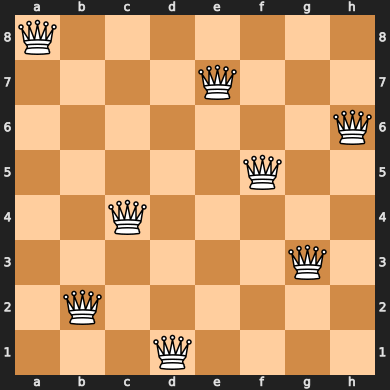

In [177]:
imgBoard = chess.Board(board_to_fen(board))
imgBoard

# Código Fuerza Bruta

In [178]:
board2 = [
        ["em","em","em","em","em","em","em","em"],
        ["em","em","em","em","em","em","em","em"],
        ["em","em","em","em","em","em","em","em"],
        ["em","em","em","em","em","em","em","em"],
        ["em","em","em","em","em","em","em","em"],
        ["em","em","em","em","em","em","em","em"],
        ["em","em","em","em","em","em","em","em"],
        ["em","em","em","em","em","em","em","em"],
        ]

In [179]:
# imprimir el tablero
def print_board2():
    for row in board2:
        print(row)
    print("")

In [180]:
# evaluar si una posicion esta amenazada por otra reina, para fines practicos
def conflict(row, col):
        for i in range(8):
                if board2[i][col] == "wq" and i != row:
                        return True
                for j in range(8):
                        if ((i+j) == (row+col) or (i-j) == (row-col)) and (i != row and j != col):
                                if board2[i][j] == "wq":
                                        return True
        return False

In [181]:
def insert(row, col):
        board2[row][col] = "wq"
        board2[row][col-1] = "em"

In [182]:
def main():
  while True:
        for col0 in range(8):
                insert(0, col0)
                for col1 in range(8):
                        insert(1, col1)
                        for col2 in range(8):
                                insert(2, col2)
                                for col3 in range(8):
                                        insert(3, col3)
                                        for col4 in range(8):
                                                insert(4, col4)
                                                for col5 in range(8):
                                                        insert(5, col5)
                                                        for col6 in range(8):
                                                                insert(6, col6)
                                                                for col7 in range(8):
                                                                        insert(7, col7)
                                                                        if not conflict(0, col0) and not conflict(1, col1) and not conflict(2, col2) and not conflict(3, col3) and not conflict(4, col4) and not conflict(5, col5) and not conflict(6, col6) and not conflict(7, col7):
                                                                                print("found!")
                                                                                print_board2()
                                                                                print("--- %s seconds ---" % (time.time() - start_time))
                                                                                return False

In [183]:
start_time = time.time()
main()

found!
['wq', 'em', 'em', 'em', 'em', 'em', 'em', 'em']
['em', 'em', 'em', 'em', 'wq', 'em', 'em', 'em']
['em', 'em', 'em', 'em', 'em', 'em', 'em', 'wq']
['em', 'em', 'em', 'em', 'em', 'wq', 'em', 'em']
['em', 'em', 'wq', 'em', 'em', 'em', 'em', 'em']
['em', 'em', 'em', 'em', 'em', 'em', 'wq', 'em']
['em', 'wq', 'em', 'em', 'em', 'em', 'em', 'em']
['em', 'em', 'em', 'wq', 'em', 'em', 'em', 'em']

--- 9.157490015029907 seconds ---


False

In [184]:
print(board_to_fen(board2))

Q7/4Q3/7Q/5Q2/2Q5/6Q1/1Q6/3Q4 


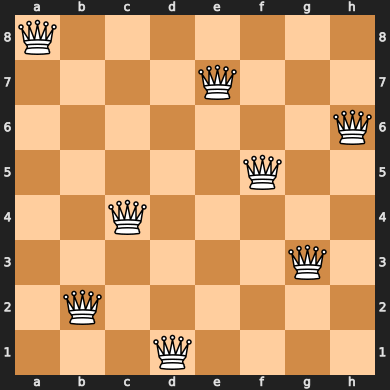

In [185]:
imgBoard2 = chess.Board(board_to_fen(board2))
imgBoard2

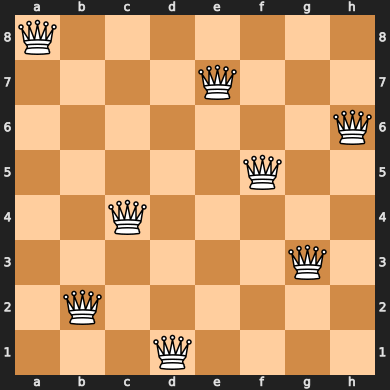

In [186]:
imgBoard

# Esta función a continuación, es utilizando el codigo de fuerza bruta para encontrar una solucion concreta. Como simplemente nos entrega la primera solución, esta lo que hace es dado un numero de solucion va iterando por la función hasta encontrar dicha solución.

In [190]:
def main2():
  board2 = [
        ["em","em","em","em","em","em","em","em"],
        ["em","em","em","em","em","em","em","em"],
        ["em","em","em","em","em","em","em","em"],
        ["em","em","em","em","em","em","em","em"],
        ["em","em","em","em","em","em","em","em"],
        ["em","em","em","em","em","em","em","em"],
        ["em","em","em","em","em","em","em","em"],
        ["em","em","em","em","em","em","em","em"],
        ]
  inicio = int(input("Indique el numero de solución que desea visualizar: "))
  final = 0
  while True:
        for col0 in range(8):
                insert(0, col0)
                for col1 in range(8):
                        insert(1, col1)
                        for col2 in range(8):
                                insert(2, col2)
                                for col3 in range(8):
                                        insert(3, col3)
                                        for col4 in range(8):
                                                insert(4, col4)
                                                for col5 in range(8):
                                                        insert(5, col5)
                                                        for col6 in range(8):
                                                                insert(6, col6)
                                                                for col7 in range(8):
                                                                        insert(7, col7)
                                                                        if not conflict(0, col0) and not conflict(1, col1) and not conflict(2, col2) and not conflict(3, col3) and not conflict(4, col4) and not conflict(5, col5) and not conflict(6, col6) and not conflict(7, col7):
                                                                                print("found!")
                                                                                final += 1
                                                                                print("Solución encontrada #: "+str(final))
                                                                                if final == inicio:
                                                                                  return False

Indique el numero de solución que desea visualizar: 5
found!
Solución encontrada #: 1
found!
Solución encontrada #: 2
found!
Solución encontrada #: 3
found!
Solución encontrada #: 4
found!
Solución encontrada #: 5


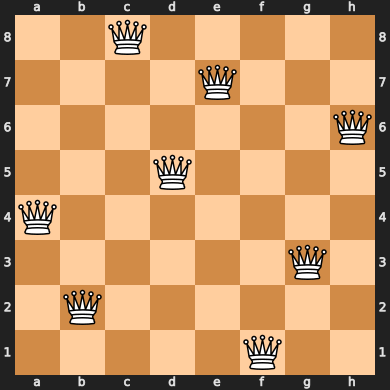

In [191]:
main2()
imgBoard3 = chess.Board(board_to_fen(board2))
imgBoard3